# Q1:  What is the average BasePay across all job titles?

# PYTHON CODE

In [20]:
#Q1
average = np.mean(df.BasePay)

print(f"The average of BasePay is: {average}")

The average of BasePay is: 66320.09110018634


# sql code

In [ ]:
SELECT AVG(BasePay) AS AverageBasePay
FROM salaries;

# Q2: Which job title has the highest BasePay?


# PYTHON CODE

In [60]:
max_basepay_byjob = df.groupby('JobTitle')['BasePay'].max().reset_index()

job_title = max_basepay_byjob.loc[max_basepay_byjob['BasePay'].idxmax()]

print(job_title)

JobTitle    Chief of Police
BasePay           319275.01
Name: 474, dtype: object


# sql code

In [ ]:
SELECT JobTitle, BasePay
FROM salaries
ORDER BY BasePay DESC
LIMIT 1;


# Q3: How many unique job titles are there in the dataset?


# PYTHON CODE

In [ ]:
unique_count = df['JobTitle'].nunique()

print(f"The number of unique  is: {unique_count}")

# sql code

In [ ]:
SELECT COUNT(DISTINCT JobTitle) AS UniqueJobTitlesCount
FROM salaries;


# Q4: What is the total OvertimePay for each year?

# PYTHON CODE

In [27]:
total_overtime = df.groupby('Year')['OvertimePay'].sum()

print(total_overtime)

Year
2011    1.638388e+08
2012    1.846910e+08
2013    1.986214e+08
2014    2.059186e+08
Name: OvertimePay, dtype: float64


# sql code

In [ ]:
SELECT Year, SUM(OvertimePay) AS TotalOvertimePay
FROM salaries
GROUP BY Year
ORDER BY Year;

#### Q5: Which year had the highest average OtherPay?


# PYTHON CODE

In [31]:
average_otherpay = df.groupby('Year')['OtherPay'].mean()

print(average_otherpay)

HighestAverageOtherPay= max(average_otherpay)

print(f"The Highest Average OtherPay is: {HighestAverageOtherPay}")


Year
2011    3617.081926
2012    3653.437583
2013    3820.159539
2014    3505.437466
Name: OtherPay, dtype: float64
The Highest Average OtherPay is: 3820.159538637452


# sql code

In [ ]:
SELECT Year, AVG(OtherPay) AS AverageOtherPay
FROM salaries
GROUP BY Year
ORDER BY AverageOtherPay DESC
LIMIT 1;

#### Q6: What is the median TotalPay for each job title?


# PYTHON CODE

In [32]:
median_TotalPay = df.groupby('JobTitle')['TotalPay'].median()

print(median_TotalPay)

JobTitle
ACCOUNT CLERK                                     49777.820
ACCOUNTANT                                        60076.240
ACCOUNTANT INTERN                                 17658.505
ACPO,JuvP, Juv Prob (SFERS)                       62290.780
ACUPUNCTURIST                                     67594.400
                                                    ...    
X-RAY LABORATORY AIDE                             60333.125
X-Ray Laboratory Aide                             60047.290
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870
Youth Comm Advisor                                44449.895
ZOO CURATOR                                       66686.560
Name: TotalPay, Length: 2158, dtype: float64


# sql code

In [ ]:
SELECT 
    JobTitle,
    AVG(TotalPay) AS MedianTotalPay
FROM MedianSalaries
GROUP BY JobTitle;


#### Q7: How many employees are there in each agency?


# PYTHON CODE

In [37]:
number_employee_each_Agency = df.groupby('Agency')['EmployeeName'].nunique()

print(number_employee_each_Agency)

number_employee_each_Agency = df.groupby('Agency')['EmployeeName'].value_counts()
print(number_employee_each_Agency)


Agency
San Francisco    110810
Name: EmployeeName, dtype: int64
Agency         EmployeeName          
San Francisco  Kevin Lee                 13
               Richard Lee               11
               Steven Lee                11
               William Wong              11
               John Chan                  9
                                         ..
               Zulema Gutierrez           1
               Zulma V Merino-Fuentes     1
               Zun Jin  Zhang He          1
               Zuna Luu                   1
               Zuri  Jones                1
Name: EmployeeName, Length: 110810, dtype: int64


# sql code

In [ ]:
SELECT Agency, COUNT(EmployeeID) AS NumberOfEmployees
FROM salaries
GROUP BY Agency
ORDER BY Agency;


#### Q8: What is the maximum Benefits offered by any agency?


# PYTHON CODE

In [61]:
max_Benefits = df.groupby('Benefits')['Agency'].max().reset_index()

agency = max_Benefits.loc[max_Benefits['Benefits'].idxmax()]

print(agency )

Benefits         96570.66
Agency      San Francisco
Name: 98460, dtype: object


# sql code

In [ ]:
SELECT Agency, MAX(Benefits) AS MaximumBenefits
FROM salaries;


#### Q9: What is the total BasePay, OvertimePay, and OtherPay for each employee?


# PYTHON CODE

In [54]:
total_pay_per_employee = df.groupby('EmployeeName')[['BasePay', 'OvertimePay', 'OtherPay']].sum()

print(total_pay_per_employee)

                         BasePay  OvertimePay  OtherPay
EmployeeName                                           
A BERNARD FATOOH        19969.37         0.00     70.54
A Bernard  Fatooh       23908.50         0.00     15.12
A Bernard Fatooh        42533.70         0.00     27.84
A ELIZABETH MARCHASIN   23591.80         0.00   2691.06
A JAMIL NIAZI           69058.19         0.00  18438.02
...                          ...          ...       ...
Zun Jin Zhang He       105225.01      3691.82   6723.91
Zuna Luu                51502.86         0.00   1015.22
Zuna T Luu             109729.00       264.36   2249.99
Zuri  Jones             71986.90         0.00      0.00
Zuri Jones             153256.06         0.00      0.00

[110810 rows x 3 columns]


# sql code

In [ ]:
SELECT 
    EmployeeID, 
    SUM(BasePay) AS TotalBasePay, 
    SUM(OvertimePay) AS TotalOvertimePay, 
    SUM(OtherPay) AS TotalOtherPay
FROM salaries
GROUP BY EmployeeID
ORDER BY EmployeeID;


#### Q10: Which employee has the highest TotalPayBenefits?


# PYTHON CODE

In [79]:
total_pay_benefits= df.groupby('EmployeeName')['TotalPayBenefits'].sum()
employee = total_pay_benefits.idxmax()
print(employee)

Kevin Lee


# sql code

In [ ]:
SELECT EmployeeID, TotalPayBenefits
FROM salaries
ORDER BY TotalPayBenefits DESC
LIMIT 1;


#### Q11: How does the average TotalPayBenefits vary across years?


# PYTHON CODE

In [80]:
average_totalpaybenefits= df.groupby('Year')['TotalPayBenefits'].mean()
print(average_totalpaybenefits)

Year
2011    100372.723871
2012    100553.255376
2013    102486.542083
2014    100261.455246
Name: TotalPayBenefits, dtype: float64


# sql code

In [ ]:
SELECT Year, AVG(TotalPayBenefits) AS AverageTotalPayBenefits
FROM salaries
GROUP BY Year
ORDER BY Year;


#### Q12: What is the total BasePay for each status (full-time, part-time, etc.)?


# PYTHON CODE

In [55]:
total_basepay = df.groupby('Status')['BasePay'].sum()

print(total_basepay)

Status
FT    9.357392e+09
PT    5.010892e+08
Name: BasePay, dtype: float64


# sql code

In [ ]:
SELECT Status, SUM(BasePay) AS TotalBasePay
FROM salaries
GROUP BY Status;


#### Q13: How many employees are there for each job title in each agency?


# PYTHON CODE

In [56]:
employees= df.groupby(['JobTitle', 'Agency'])['EmployeeName'].nunique().reset_index()

print(employees)

                                            JobTitle         Agency  \
0                                      ACCOUNT CLERK  San Francisco   
1                                         ACCOUNTANT  San Francisco   
2                                  ACCOUNTANT INTERN  San Francisco   
3                        ACPO,JuvP, Juv Prob (SFERS)  San Francisco   
4                                      ACUPUNCTURIST  San Francisco   
...                                              ...            ...   
2153                           X-RAY LABORATORY AIDE  San Francisco   
2154                           X-Ray Laboratory Aide  San Francisco   
2155  YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  San Francisco   
2156                              Youth Comm Advisor  San Francisco   
2157                                     ZOO CURATOR  San Francisco   

      EmployeeName  
0               83  
1                5  
2               48  
3                1  
4                1  
...            ...  


# sql code

In [ ]:
SELECT Agency, JobTitle, COUNT(EmployeeID) AS NumberOfEmployees
FROM salaries
GROUP BY Agency, JobTitle
ORDER BY Agency, JobTitle;


#### Q14: Which job title has the highest average Benefits?


# PYTHON CODE

In [59]:
average_benefits = df.groupby('JobTitle')['Benefits'].mean().reset_index()

job_title = average_benefits.loc[average_benefits['Benefits'].idxmax()]
print(job_title)


JobTitle    Chief Investment Officer
Benefits                    96570.66
Name: 466, dtype: object


# sql code

In [ ]:
SELECT JobTitle, AVG(Benefits) AS AverageBenefits
FROM salaries
GROUP BY JobTitle
ORDER BY AverageBenefits DESC
LIMIT 1;


#### Q15: What is the ratio of BasePay to TotalPayBenefits for each job title?


# PYTHON CODE

In [81]:
df['BasePayToTotalPayBenefitsRatio'] = df['BasePay'] / df['TotalPayBenefits']

ratio_per_job_title = df.groupby('JobTitle')['BasePayToTotalPayBenefitsRatio'].sum()

print(ratio_per_job_title)

JobTitle
ACCOUNT CLERK                                     47.627538
ACCOUNTANT                                         2.642880
ACCOUNTANT INTERN                                 20.697166
ACPO,JuvP, Juv Prob (SFERS)                        0.776051
ACUPUNCTURIST                                      0.689798
                                                    ...    
X-RAY LABORATORY AIDE                             14.549039
X-Ray Laboratory Aide                             72.660990
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS     0.639545
Youth Comm Advisor                                 2.526301
ZOO CURATOR                                        0.452688
Name: BasePayToTotalPayBenefitsRatio, Length: 2158, dtype: float64


# sql code

In [ ]:
SELECT 
    JobTitle, 
    SUM(BasePay) / SUM(TotalPayBenefits) AS BasePayToTotalPayBenefitsRatio
FROM salaries
GROUP BY JobTitle;


#### Q16: Which job title has the highest ratio of BasePay to TotalPayBenefits?


# PYTHON CODE

In [86]:
df['BasePayToTotalPayBenefitsRatio'] = df['BasePay'] / df['TotalPayBenefits']

ratio_per_jobtitle = df.groupby('JobTitle')['BasePayToTotalPayBenefitsRatio'].max().reset_index()
job_title = ratio_per_jobtitle.loc[ratio_per_jobtitle['BasePayToTotalPayBenefitsRatio'].idxmax()]

print(job_title)

JobTitle                          Accountant III
BasePayToTotalPayBenefitsRatio               1.0
Name: 120, dtype: object


# sql code

In [ ]:
SELECT JobTitle, BasePayToTotalPayBenefitsRatio
FROM (
    SELECT 
        JobTitle, 
        SUM(BasePay) / SUM(TotalPayBenefits) AS BasePayToTotalPayBenefitsRatio
    FROM salaries
    GROUP BY JobTitle
) AS Ratios
ORDER BY BasePayToTotalPayBenefitsRatio DESC
LIMIT 1;


#### Q17: How many years of data are available in the dataset?


# PYTHON CODE

In [87]:
years = df['Year'].nunique()

print(f"There are {years} years.")

There are 4 years.


# sql code

In [ ]:
SELECT COUNT(DISTINCT YEAR) AS num_years
FROM salaries;

#### Q18: What is the average BasePay for each year and job title combination?


# PYTHON CODE

In [88]:
average_basepay = df.groupby(['Year', 'JobTitle'])['BasePay'].mean()

print(average_basepay)

Year  JobTitle                      
2011  ACCOUNT CLERK                     43300.806506
      ACCOUNTANT                        46643.172000
      ACCOUNTANT INTERN                 28732.663958
      ACUPUNCTURIST                     66374.400000
      ADMINISTRATIVE ANALYST            63435.628602
                                            ...     
2014  Wire Rope Cable Maint Sprv        93904.720000
      Worker's Comp Supervisor 1        54505.333333
      Worker's Compensation Adjuster    69915.985385
      X-Ray Laboratory Aide             45490.340286
      Youth Comm Advisor                32417.420000
Name: BasePay, Length: 4136, dtype: float64


# sql code

In [ ]:
SELECT Year, JobTitle, AVG(BasePay) AS AverageBasePay
FROM salaries
GROUP BY Year, JobTitle
ORDER BY Year, JobTitle;


#### Q19: How many employees have a TotalPayBenefits greater than $326373.19??


# PYTHON CODE

In [93]:
high_totalpay_employees = df[df['TotalPayBenefits'] > 326373.19]

num_employees = high_totalpay_employees.shape[0]

print(f"There are {num_employees} employees ")

There are 151 employees 


# sql code

In [ ]:
SELECT COUNT(*) AS NumberOfEmployees
FROM salaries
WHERE TotalPayBenefits > 326373.19;


#### Q20: Which agency has the highest average TotalPayBenefits?


# PYTHON CODE

In [94]:
average_totalpay= df.groupby('Agency')['TotalPayBenefits'].mean().reset_index()

agency = average_totalpay.loc[average_totalpay['TotalPayBenefits'].idxmax()]

print(agency)

Agency              San Francisco
TotalPayBenefits    100923.603254
Name: 0, dtype: object


# sql code

In [ ]:
SELECT Agency, AVG(TotalPayBenefits) AS AverageTotalPayBenefits
FROM salaries
GROUP BY Agency
ORDER BY AverageTotalPayBenefits DESC
LIMIT 1;


In [17]:
import pandas as pd 
import numpy as np

df = pd.read_csv(r'C:\Users\pc\OneDrive\Desktop\برامج\Power diploma\New folder\Salarieeees (1).csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,28628.62,567595.43,567595.43,2011,San Francisco,FT
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,28628.62,538909.28,538909.28,2011,San Francisco,FT
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,28628.62,335279.91,335279.91,2011,San Francisco,FT
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,28628.62,332343.61,332343.61,2011,San Francisco,FT
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,28628.62,326373.19,326373.19,2011,San Francisco,FT


In [95]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,BasePayToTotalPayBenefitsRatio
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.0,0.0,0.0,0.0,0.0,2014,San Francisco,PT,NaN
148646,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.0,0.0,0.0,0.0,0.0,2014,San Francisco,PT,NaN
148647,148649,Leon Walker,Custodian,0.0,0.0,0.0,0.0,0.0,0.0,2014,San Francisco,PT,NaN
148648,148650,Roy I Tillery,Custodian,0.0,0.0,0.0,0.0,0.0,0.0,2014,San Francisco,PT,NaN
148649,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,0.0,0.0,0.0,0.0,2014,San Francisco,PT,NaN


# Excel Dashboard


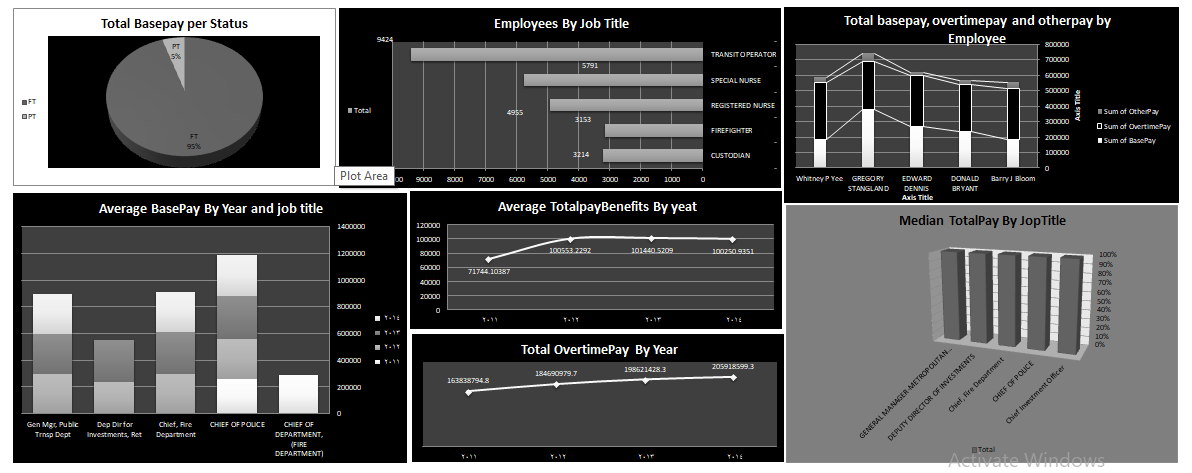

# BowerBi Dashboard

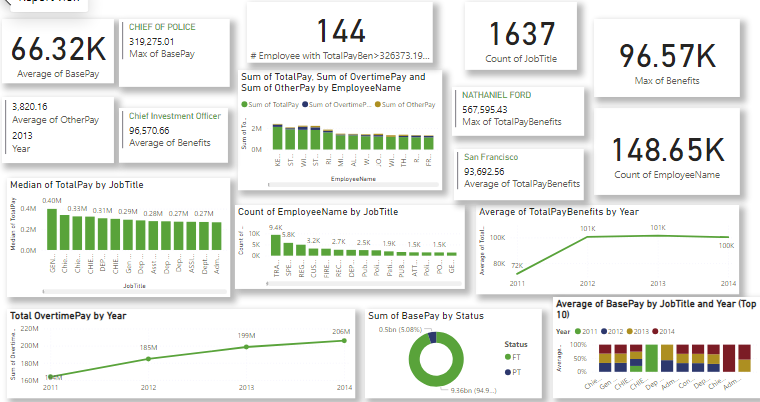